In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [62]:
df = pd.read_csv('/content/ParisHousing.csv', delimiter = ',')

In [63]:
df.head()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard


In [64]:
df.dropna(inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   squareMeters       10000 non-null  int64  
 2   numberOfRooms      10000 non-null  object 
 3   floors             10000 non-null  int64  
 4   cityCode           10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  bool   
 9   hasStormProtector  10000 non-null  bool   
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  bool   
 14  hasGuestRoom       10000 non-null  int64  
 15  price              10000 non-null  float64
 16  category           1000

In [66]:
df.shape

(10000, 18)

In [67]:
# Gender = []
# for i in range(len(df)):
#   if df['Gender'][i]=='Male':
#     Gender.append(1)
#   else:
#     Gender.append(0)
# df['Gender']=Gender

In [68]:
# Specialization = []
# for i in range(len(df)):
#   if df['Specialization'][i]=='Marketing' or df['Specialization'][i]=='LOS':
#     Specialization.append(1)
#   else:
#     Specialization.append(0)
# df['Specialization'] = Specialization

In [69]:
cat = []
for i in range(len(df)):
  if df['category'][i]=='Basic':
    cat.append(0)
  else:
    cat.append(1)
df['category'] = cat

In [70]:
df.head()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,0,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,1,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,0,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,0,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,1,has pool and has yard


In [71]:
X = df.drop(['category'], axis=1)
y = df['category']

In [72]:
X.head()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,has pool and has yard


In [73]:
X.shape

(10000, 17)

In [74]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: category, dtype: int64

In [75]:
y.shape

(10000,)

In [76]:
X.drop(['numberOfRooms', 'PoolAndYard'], inplace=True, axis=1)

In [77]:
X.head()

,Unnamed: 0,squareMeters,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,75523,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5
1,1,80771,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5
2,2,55712,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1
3,3,32316,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2
4,4,70429,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
m1 = GaussianNB()
m2 = DecisionTreeClassifier()
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
print(m1.score(X_test, y_test))
print(m2.score(X_test, y_test))

0.8743333333333333
0.802


Test acc for Naive bayes model is 0.8735, Test acc for Decision Tree model is 0.8058
Train acc for Naive bayes model is 1.0, Train acc for Decision Tree model is 1.0
Confusion matrix for Naive Bayes model is [[175   0]
 [ 25   0]], Confusion matrix for Decision Tree model is [[148  27]
 [ 15  10]]


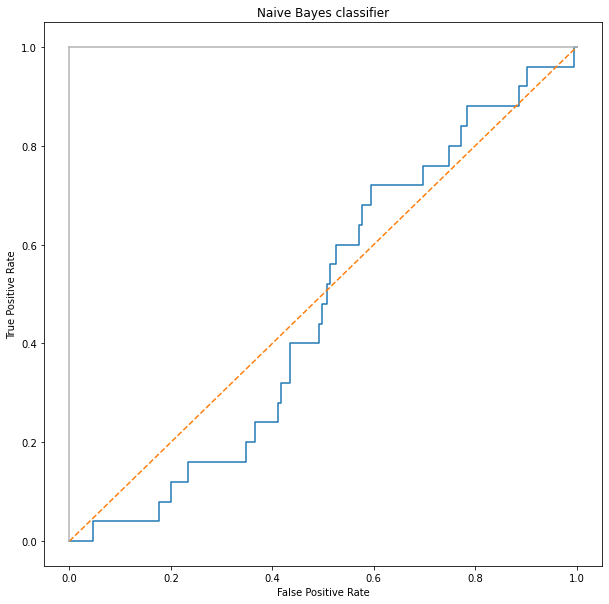

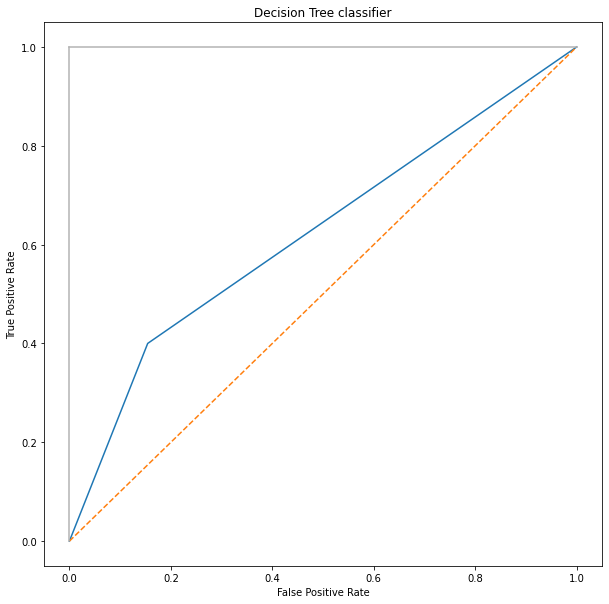

In [79]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
model1 = GaussianNB()
model2 = DecisionTreeClassifier()

kf = KFold(n_splits=50, shuffle=True)
test_acc = [[],[]]
train_acc = [[],[]]
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  # print(X_train.head(), y_train.head())
  model1.fit(X_train, y_train)
  model2.fit(X_train, y_train)
  y_score1 = model1.predict_proba(X_test)[:,1]
  y_score2 = model2.predict_proba(X_test)[:,1]
  test_acc[0].append(model1.score(X_test, y_test))
  train_acc[0].append(model1.score(X_train, y_train))
  test_acc[1].append(model2.score(X_test, y_test))
  train_acc[1].append(model2.score(X_train, y_train))
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

print(f"Test acc for Naive bayes model is {np.mean(test_acc[0])}, Test acc for Decision Tree model is {np.mean(test_acc[1])}")
print(f"Train acc for Naive bayes model is {np.mean(train_acc[1])}, Train acc for Decision Tree model is {np.mean(train_acc[1])}")
print(f"Confusion matrix for Naive Bayes model is {confusion_matrix(y_test, model1.predict(X_test))}, Confusion matrix for Decision Tree model is {confusion_matrix(y_test, model2.predict(X_test))}")

plt.subplots(1, figsize=(10,10))
plt.title('Naive Bayes classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Decision Tree classifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# print(X_train.head(), X_test.head(), y_train.head(), y_test.head())
m.fit(X_train, y_train)
print(f"Accuracy of Random forest classifier is {m.score(X_test, y_test)}")

Accuracy of Random forest classifier is 0.8733333333333333
